merge data

In [9]:
import pandas as pd
df1= pd.DataFrame({
    'customer_id':[1,2,3,4,5],
    'name':['Sondos','Yara','Noura','Roaa','Esraa']
    
})

In [10]:
df1

,customer_id,name
0,1,Sondos
1,2,Yara
2,3,Noura
3,4,Roaa
4,5,Esraa


In [21]:
df2=pd.DataFrame({
    'customer_id':[2,3,4,5],
    'purchase':['laptop','Tv','car','phone']
})

In [22]:
df2

,customer_id,purchase
0,2,laptop
1,3,Tv
2,4,car
3,5,phone


In [23]:
inner_join =pd.merge(df1,df2,on='customer_id',how='inner')
# takes the commen between them
inner_join

,customer_id,name,purchase
0,2,Yara,laptop
1,3,Noura,Tv
2,4,Roaa,car
3,5,Esraa,phone


In [26]:
left_join=pd.merge(df1,df2,on='customer_id', how='left')
left_join

,customer_id,name,purchase
0,1,Sondos,NaN
1,2,Yara,laptop
2,3,Noura,Tv
3,4,Roaa,car
4,5,Esraa,phone


In [27]:
right_join=pd.merge(df1,df2,on='customer_id',how='right')
right_join

,customer_id,name,purchase
0,2,Yara,laptop
1,3,Noura,Tv
2,4,Roaa,car
3,5,Esraa,phone


In [28]:
outer_join=pd.merge(df1,df2,on='customer_id',how='outer')
outer_join

,customer_id,name,purchase
0,1,Sondos,NaN
1,2,Yara,laptop
2,3,Noura,Tv
3,4,Roaa,car
4,5,Esraa,phone


handle missing data

In [30]:
data={
    'age':[25,30,18,None,19,22,None],
    'blood pressures':[120,130,110,None,140,145,None],
    'Colestrol':[200,None,190,210,None,100,220]
    
}

dataf=pd.DataFrame(data)
dataf

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,18.0,110.0,190.0
3,NaN,NaN,210.0
4,19.0,140.0,NaN
5,22.0,145.0,100.0
6,NaN,NaN,220.0


In [32]:
dataf.isnull().sum()

age                2
blood pressures    2
Colestrol          2
dtype: int64

In [33]:
dataf_copy=dataf

dataf_copy

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,18.0,110.0,190.0
3,NaN,NaN,210.0
4,19.0,140.0,NaN
5,22.0,145.0,100.0
6,NaN,NaN,220.0


In [34]:
dataf_copy=dataf_copy.dropna()
dataf_copy

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
2,18.0,110.0,190.0
5,22.0,145.0,100.0


In [35]:
data_copy=dataf

data_copy

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,18.0,110.0,190.0
3,NaN,NaN,210.0
4,19.0,140.0,NaN
5,22.0,145.0,100.0
6,NaN,NaN,220.0


In [36]:
data_copy=data_copy.dropna(subset=['age'])
data_copy

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,18.0,110.0,190.0
4,19.0,140.0,NaN
5,22.0,145.0,100.0


In [40]:
ddata_copy=dataf
ddata_copy['age'].fillna(ddata_copy['age'].mean(),inplace=True)
ddata_copy

C:\Users\SOFT LAPTOP\AppData\Local\Temp\ipykernel_22424\1262734791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ddata_copy['age'].fillna(ddata_copy['age'].mean(),inplace=True)


,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,18.0,110.0,190.0
3,22.8,NaN,210.0
4,19.0,140.0,NaN
5,22.0,145.0,100.0
6,22.8,NaN,220.0


In [43]:
ddata_copy['Colestrol'].fillna(120,inplace=True)
ddata_copy

,age,blood pressures,Colestrol
0,25.0,120.0,200.0
1,30.0,130.0,120.0
2,18.0,110.0,190.0
3,22.8,NaN,210.0
4,19.0,140.0,120.0
5,22.0,145.0,100.0
6,22.8,NaN,220.0


feature scalling & engneering

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data_standered=scaler.fit_transform(dataf_copy)

In [45]:
data_standered

array([[ 1.16247639, -0.33968311,  0.81537425],
       [-1.27872403, -1.01904933,  0.59299945],
       [ 0.11624764,  1.35873244, -1.4083737 ]])

In [46]:
data_standered=pd.DataFrame(data_standered,columns=dataf_copy.columns)
data_standered

,age,blood pressures,Colestrol
0,1.162476,-0.339683,0.815374
1,-1.278724,-1.019049,0.592999
2,0.116248,1.358732,-1.408374


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()

normalised3=scaler2.fit_transform(dataf_copy)

In [64]:
normalised3

array([[1.        , 0.28571429, 1.        ],
       [0.        , 0.        , 0.9       ],
       [0.57142857, 1.        , 0.        ]])

In [65]:
normalised3=pd.DataFrame(normalised3,columns=dataf_copy.columns)


In [66]:
normalised3

,age,blood pressures,Colestrol
0,1.000000,0.285714,1.0
1,0.000000,0.000000,0.9
2,0.571429,1.000000,0.0


feature engneering 

In [67]:
df=pd.DataFrame({
    'color':['red','blue','pink']
})
df

,color
0,red
1,blue
2,pink


In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['color'] =le.fit_transform(df['color'])

In [69]:
df

,color
0,2
1,0
2,1


TASK ONE

In [70]:
dt2=pd.DataFrame({
    'animal':['cat','dog','duck']
})
dt2

,animal
0,cat
1,dog
2,duck


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
dt2_np=dt2.to_numpy()
ve= OneHotEncoder()


dt2_ve=ve.fit_transform(dt2_np)
dt2_ve_df = pd.DataFrame(dt2_ve.toarray(), columns=ve.get_feature_names_out())
print(dt2_ve_df)



   x0_cat  x0_dog  x0_duck
0     1.0     0.0      0.0
1     0.0     1.0      0.0
2     0.0     0.0      1.0


In [88]:

encoded = pd.get_dummies(dt2, dtype=int)


print(encoded)

   animal_cat  animal_dog  animal_duck
0           1           0            0
1           0           1            0
2           0           0            1


In [72]:
df3=pd.DataFrame({
    'gender':['m','f','f','m']
})

In [73]:
mapping={'m':0,'f':1}
df3['gender']=df3['gender'].map(mapping)

df3

,gender
0,0
1,1
2,1
3,0


outliers

TASK 2

In [96]:
df44=pd.DataFrame({
    'nums':[1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,9,400,500,600]
})

<Axes: ylabel='nums'>

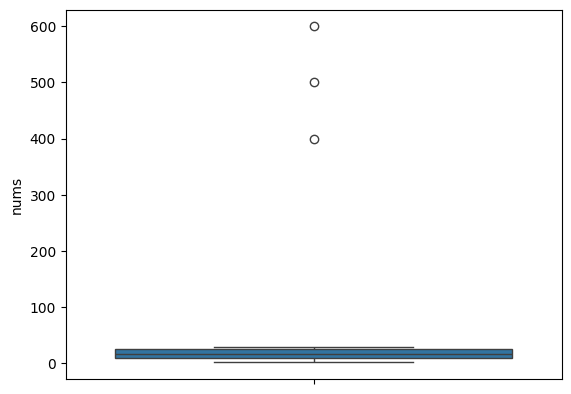

In [97]:
import seaborn as sns
sns.boxplot(df44['nums'])

In [98]:
outliers=[]
threshold=3
mean=np.mean(df44['nums'])
std=np.std(df44['nums'])

for i in df44['nums']:
    z_score=(i-mean)/std
    if (np.abs(z_score) > threshold):
            outliers.append(i)
            
print(outliers)
            

[500, 600]


In [99]:
df_wo_outliers = df44.drop(df44[df44['nums'].isin(outliers)].index)
df_wo_outliers

,nums
0,1
1,2
2,3
3,4
4,5
5,6
6,8
7,9
8,10
9,11


In [100]:
from scipy.stats import zscore

z_scoreee=zscore(df44['nums'])
thres=3
df_outlierss=df44[(abs(z_scoreee) >thres)].index
df_yay=df44.drop(df_outlierss)
df_yay

,nums
0,1
1,2
2,3
3,4
4,5
5,6
6,8
7,9
8,10
9,11
